In [1]:
from math import *
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
#first set up all constants and initial conditions

#position
pos_sun = np.array([0,0])

pos_merc = np.array ([0.39 , 0])
pos_ven = np.array([0.723 , 0])
pos_earth = np.array([1,0])
pos_mars = np.array ([1.524,0])
pos_jup = np.array([4.95 , 0])
pos_sat = np.array ([9.6 , 0])
pos_ura = np.array([19.2 , 0])
pos_nep = np.array([30.1 , 0])

#velocity
vel_sun = np.array([0,0])

vel_merc = np.array([0 , 3.15766666e-7])
vel_ven = np.array([0 , 2.334666666e-7])
vel_earth = np.array([0 ,(2e-7)])
vel_mars = np.array([0 , (1.605133333e-7)])
vel_jup = np.array([0 , (8.704e-8)])
vel_sat = np.array([0 , (6.448e-8)])
vel_ura = np.array([0, (4.532733333e-8)])
vel_nep = np.array([0 , (3.623933333e-8)])

#mass
mass_sun = 1.989e30

mass_merc = 3.3010e23
mass_ven = 4.8673e24
mass_earth = 5.972e24
mass_mars = 6.4169e23 
mass_jup = 1.8981e27
mass_sat = 5.6832e26
mass_ura = 8.6810e25
mass_nep = 1.0241e26


G = 1.976e-44


position = np.array([pos_sun , pos_earth, pos_mars , pos_merc , pos_ven , pos_jup , pos_sat , pos_ura , pos_nep ])
velocity = np.array([vel_sun , vel_earth, vel_mars, vel_merc, vel_ven , vel_jup , vel_sat , vel_ura , vel_nep ])
mass = np.array([mass_sun , mass_earth, mass_mars, mass_merc , mass_ven , mass_jup , mass_sat , mass_ura , mass_nep])


In [3]:
def computeAccel(x,m):
    '''
    this method computes the acceleration on the bodies
 
    Parameters
    -----------
    x : array of positions for all bodies
    m : array of masses of all bodies
    
    Returns
    ---------
    a : array of the acceleration of all bodies
    '''
    a=np.zeros_like(x)
    nbodies = x.shape[0]
    for i in range(nbodies):
        for j in range(nbodies):
            r=x[j]-x[i]
            if i !=j:
                a[i]=a[i]+r*G*m[j]/pow(np.vdot(r,r),1.5)
    return a

In [4]:
def leapFrog(x, v, a, m, dt):
    """ 
    Performs one leap frog step
    
    Parameters
    ------------
    x : array of positions for all bodies
    v : array of velocities for all bodies
    a : array of accelerations for all bodies
    m : array of masses of all bodies
    dt : the timestep
    
    Returns
    --------
    x : array of updated positions for all bodies
    v : array of updated velocities for all bodies
    a : array of updated accelerations for all bodies
    """
    v = v + 0.5*dt*a
    x = x + dt*v
    a = computeAccel(x, m)
    v = v + 0.5*dt*a
    return x,v,a

In [5]:
#use this cell to plot the results

max_time = 50*365*24*60*60
dt = 1*24*60*60
time = 0

acceleration = computeAccel(position, mass)
each_position = []

while time <= max_time:
    position, velocity, acceleration = (leapFrog(position, velocity, acceleration, mass, dt))
    time = time + dt
    each_position.append(position)
    
#print(position, velocity, acceleration)
each_position = np.array(each_position)


In [6]:
sunx = each_position[:: , 0 , 0]
suny = each_position[:: , 0 , 1]

mercx = each_position[:: , 3 , 0]
mercy = each_position[:: , 3 , 1]

venx = each_position[:: , 4 , 0]
veny = each_position[:: , 4 , 1]

earthx = each_position[:: , 1 , 0]
earthy = each_position[:: , 1 , 1]

marsx = each_position[:: , 2 , 0]
marsy = each_position[:: , 2 , 1]

jupx = each_position[:: , 5 , 0]
jupy = each_position[:: , 5 , 1]

satx = each_position[:: , 6 , 0]
saty = each_position[:: , 6 , 1]

urax = each_position[:: , 7 , 0]
uray = each_position[:: , 7 , 1]

nepx = each_position[:: , 8 , 0]
nepy = each_position[:: , 8 , 1]

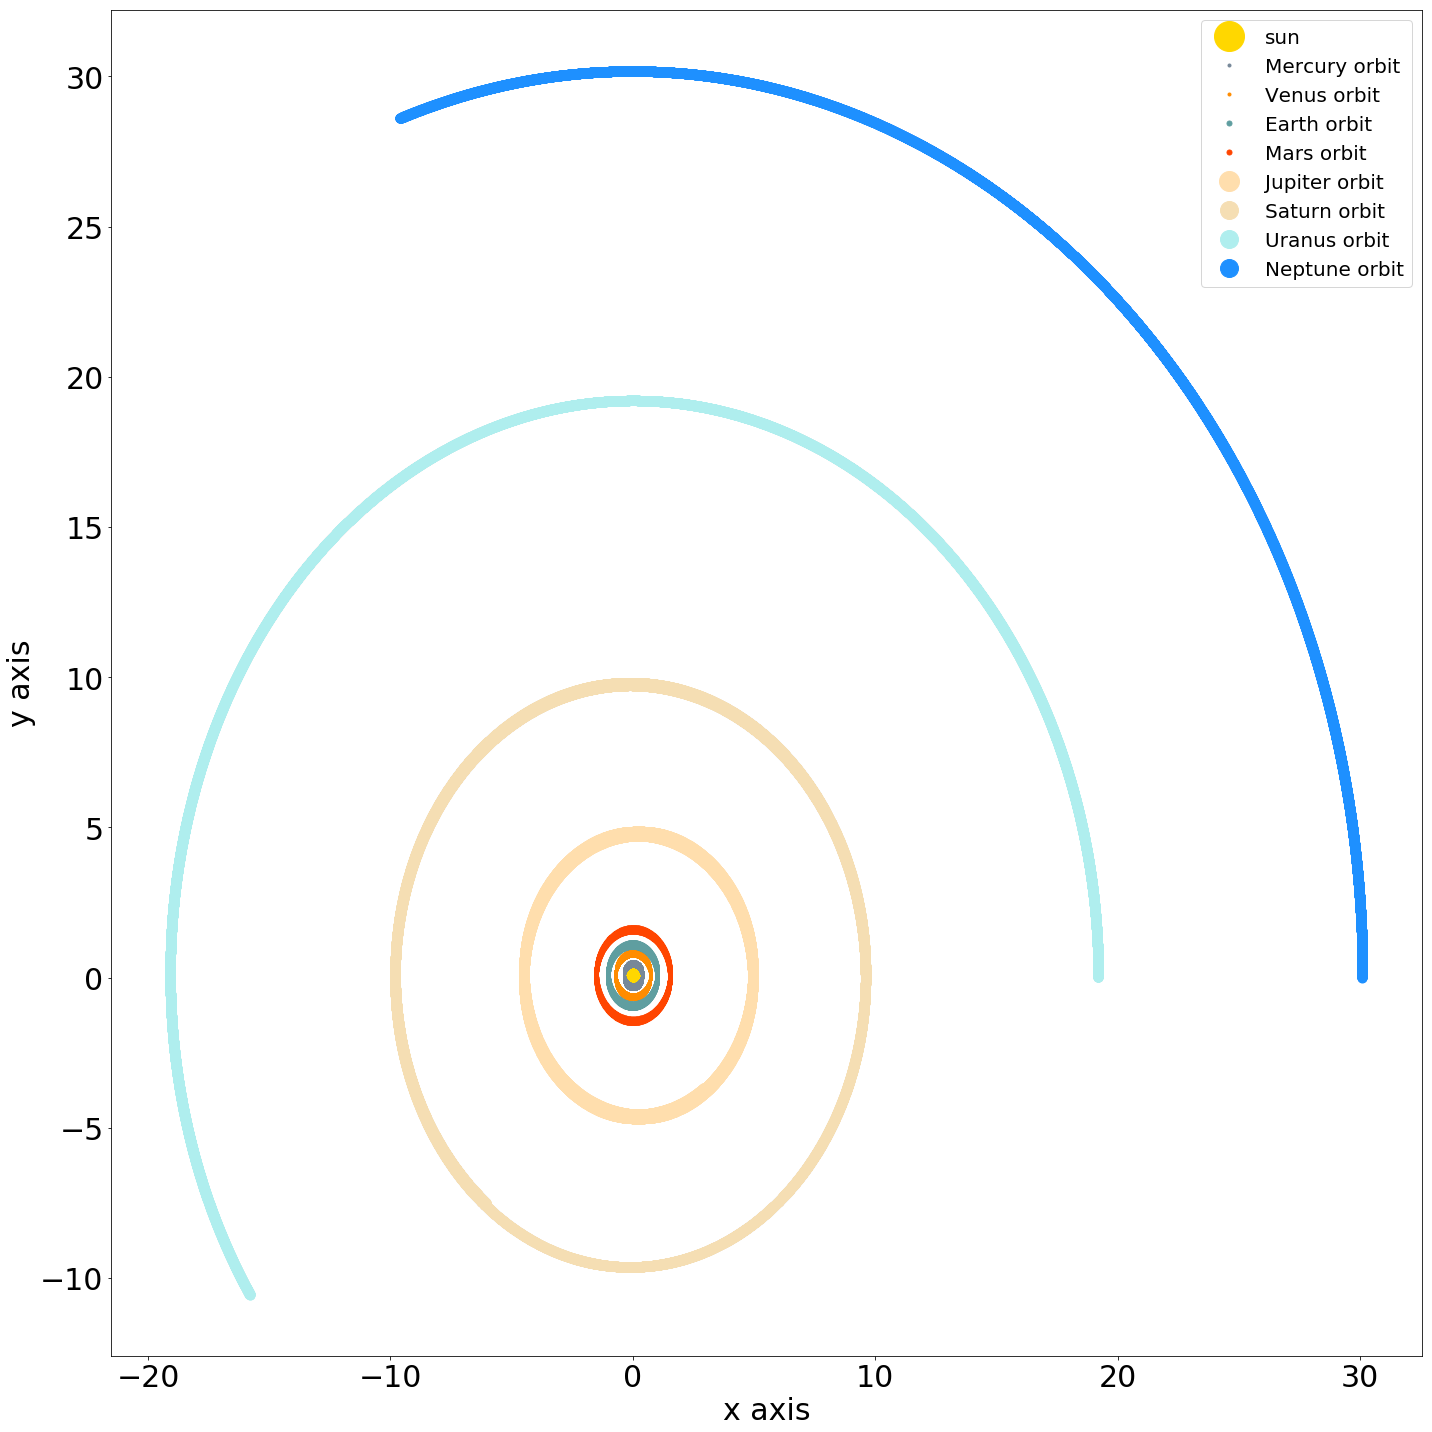

In [18]:
#giving the figure a variable
fig = plt.figure(figsize = (20,20))

#plotting the sun
plt.plot(sunx , suny, '.' , ms = 30 ,  color = 'gold', label = 'sun')

#plotting the planets' orbits
plt.plot(mercx , mercy , '.' , ms = 3 , color = 'lightslategrey', label = 'Mercury orbit')
plt.plot(venx , veny , '.' , ms = 3, color = 'darkorange', label = 'Venus orbit')
plt.plot(earthx, earthy, '.' , ms = 5 ,color = 'cadetblue', label = 'Earth orbit')
plt.plot(marsx , marsy , '.' , ms = 5 , color = 'orangered' , label = 'Mars orbit')
plt.plot(jupx , jupy , '.' , ms = 20 , color = 'navajowhite' , label = 'Jupiter orbit')
plt.plot(satx , saty , '.' , ms = 18 , color = 'wheat' , label = 'Saturn orbit')
plt.plot(urax , uray , '.' , ms = 18 , color = 'paleturquoise' , label = 'Uranus orbit')
plt.plot(nepx , nepy , '.' , ms = 18 , color = 'dodgerblue' , label = 'Neptune orbit' )

#making the figure look pretty 
plt.legend(fontsize = 20 , markerscale = 2)
plt.xlabel('x axis', fontsize = 30)
plt.ylabel('y axis', fontsize = 30)

#this makes the labels on the x and y axis bigger
plt.gca().tick_params(labelsize = 30)

#makes it neater
plt.tight_layout()


#saving the figure 
plt.savefig('orbit.png')


In [12]:
plt.legend?

In [ ]:
fig = plt.figure()
plt.plot(sunx , suny, '.'  , ms = 8, label = 'sun')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.tight_layout()
plt.savefig('sun borther.png')

IndexError: index 18251 is out of bounds for axis 1 with size 18251

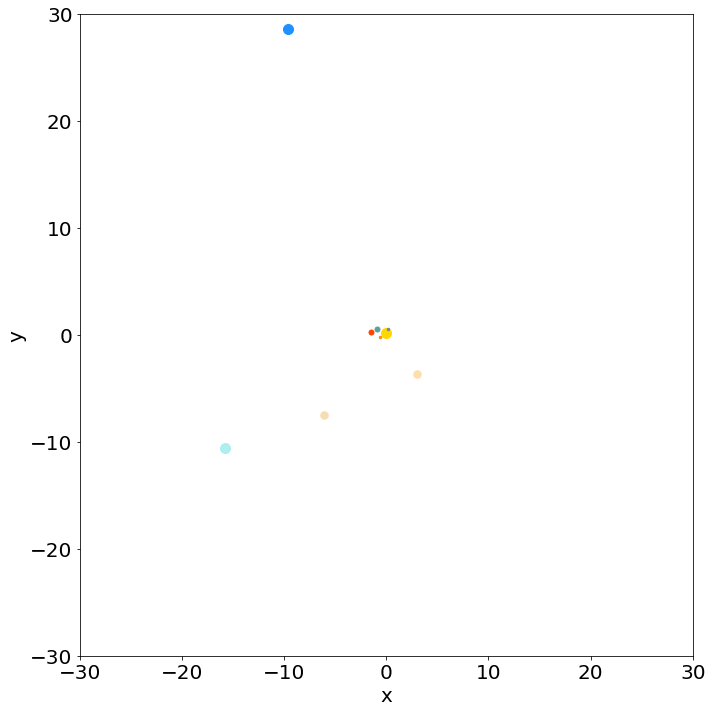

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


num =  365*100

# initialization function: plot the background of each frame
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    l3.set_data([],[])
    l4.set_data([], [])
    l5.set_data([],[])
    l6.set_data([],[])
    l7.set_data([],[])
    l8.set_data([],[])
    l9.set_data([],[])
    return l1,l2,l3,l4,l5,l6,l7,l8,l9

def update_line(num, data1, data2, data3, data4, data5, data6, data7, data8, data9, line1, line2 , line3, line4, line5, line6, line7, line8, line9):
    line1.set_data(data1[..., num])
    line2.set_data(data2[..., num])
    line3.set_data(data3[..., num])
    line4.set_data(data4[..., num])
    line5.set_data(data5[..., num])
    line6.set_data(data6[..., num])
    line7.set_data(data7[..., num])
    line8.set_data(data8[..., num])
    line9.set_data(data9[..., num])
    return line1, line2, line3, line4, line5, line6, line7, line8 , line9


fig1 = plt.figure(figsize=(10,10))

data1 = np.array([sunx, suny])

data3 = np.array([mercx , mercy])
data4 = np.array([venx , veny])            
data2 = np.array([earthx , earthy])
data5 = np.array([marsx , marsy])
data6 = np.array([jupx , jupy])
data7 = np.array([satx , saty])
data8 = np.array([urax , uray])
data9 = np.array([nepx , nepy])

#sun
l1, = plt.plot([], [], '.', ms = 20 , color = 'gold') 
#mercury
l3, = plt.plot([], [], '.', ms = 5 , color = 'lightslategrey') 
#venus
l4, = plt.plot([], [], '.', ms = 5 , color= 'darkorange')
#earth
l2, = plt.plot([], [], '.', ms = 10 , color = 'cadetblue') 
#mars
l5, = plt.plot([],[],'.', ms = 10, color = 'orangered')
#jupiter
l6, = plt.plot([],[],'.', ms = 15 , color = 'navajowhite')
#saturn
l7, = plt.plot([],[],'.', ms = 15 , color = 'wheat')
#uranus
l8, = plt.plot([],[],'.', ms = 20 , color = 'paleturquoise')
#neptune
l9, = plt.plot([],[],'.', ms = 20 , color = 'dodgerblue')

arguas=(data1, data2 , data3 , data4 , data5, data6, data7, data8, data9, l1, l2 , l3, l4, l5, l6, l7, l8, l9) #the arguments your update_line function needs

plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
#plt.legend(fontsize=16, label = ["x", "y"])
plt.gca().tick_params(labelsize=20)
plt.tight_layout()


line_ani = animation.FuncAnimation(fig1, update_line, num, init_func=init, fargs=arguas,interval=5, blit=True)
line_ani.save('allmov.mp4')

